In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n = np.arange(1, 15)
t_b = np.array([52, 53, 55, 56, 57, 58, 59, 61.65, 60, 59.5, 58.5, 58, 55, 54.75])
# two missing values of boiling tempreture were estimated using line regression

solution = np.array([(60, 0), (60, 7), (60, 14), (60, 21), (60, 28), (60, 35), (60, 42),
                    (0, 35), (12, 35), (24, 35), (36, 35), (48, 35), (60, 35), (72, 35)])

n_l = np.array([1.349, 1.359, 1.369, 1.377, 1.383, 1.388, 1.3925,
                1.434, 1.411, 1.398, 1.391, 1.384, 1.378, 1.3745])

n_v = np.array([1.348, 1.3535, 1.3585, 1.364, 1.370, 1.377, 1.385,
                1.433, 1.420, 1.395, 1.383, 1.374, 1.368, 1.363])

calc_x_ac = lambda n_mix, n_ac, n_chl: (n_mix - n_chl) / (n_ac - n_chl)

x_ac_l = np.array([calc_x_ac(n_l[i], n_l[0], n_l[7]) for i in range(14)])
x_ac_v = np.array([calc_x_ac(n_v[i], n_v[0], n_v[7]) for i in range(14)])

d = {
    'Experiment': n,
    'Boiling Temperature': t_b,
    'Liquid Phase(Ac)': x_ac_l,
    'Vapor Phase(Ac)': x_ac_v,
    'Refractive Index of Vapor': n_v,
    'Refractive Index of Liquid': n_l,
}

df = pd.DataFrame(d)
display(df.set_index('Experiment'))

,Boiling Temperature,Liquid Phase(Ac),Vapor Phase(Ac),Refractive Index of Vapor,Refractive Index of Liquid
Experiment,,,,,
1,52.00,1.000000,1.000000,1.3480,1.3490
2,53.00,0.882353,0.935294,1.3535,1.3590
3,55.00,0.764706,0.876471,1.3585,1.3690
4,56.00,0.670588,0.811765,1.3640,1.3770
5,57.00,0.600000,0.741176,1.3700,1.3830
6,58.00,0.541176,0.658824,1.3770,1.3880
7,59.00,0.488235,0.564706,1.3850,1.3925
8,61.65,-0.000000,-0.000000,1.4330,1.4340
9,60.00,0.270588,0.152941,1.4200,1.4110


In [3]:
# calculating the two missing values
d1 = np.arange(1, 6)
d2 = np.array([60, 59.5, 58.5, 58, 55])

from scipy.stats import linregress
slope = linregress(d1, d2)[0]
intercept = linregress(d1, d2)[1]
line_func = lambda x: slope * x + intercept

# T_b at 8th experiment
print(f'T_b for 35ml Chloroform: {line_func(0): .2f}')
print(f'T_b for 35ml Chloroform + 72ml Acetone: {line_func(6): .2f}')

T_b for 35ml Chloroform:  61.65
T_b for 35ml Chloroform + 72ml Acetone:  54.75


In [4]:
x_ac_l

array([ 1.        ,  0.88235294,  0.76470588,  0.67058824,  0.6       ,
        0.54117647,  0.48823529, -0.        ,  0.27058824,  0.42352941,
        0.50588235,  0.58823529,  0.65882353,  0.7       ])

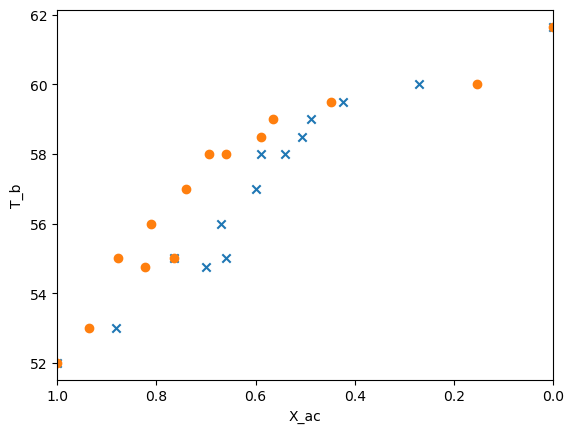

In [5]:
plt.scatter(x_ac_l, t_b, marker='x')
plt.scatter(x_ac_v, t_b, marker='o')
plt.xlim([1, 0])
plt.xlabel('X_ac')
plt.ylabel('T_b')
plt.show()

C:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


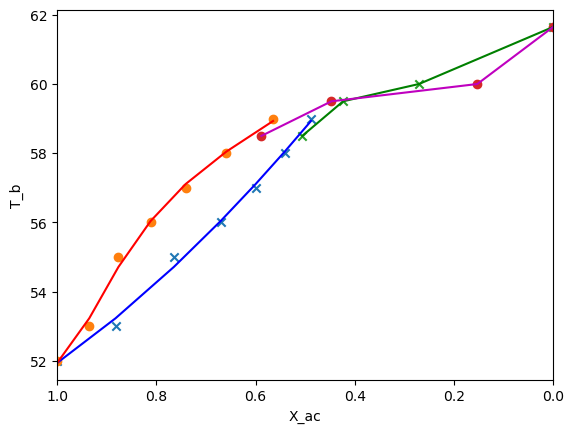

In [6]:
x_ac_l1 = x_ac_l[:7]
x_ac_v1 = x_ac_v[:7]
t_b1 = t_b[:7]

x_ac_l2 = x_ac_l[7:11]
x_ac_v2 = x_ac_v[7:11]
t_b2 = t_b[7:11]

from scipy.optimize import curve_fit

def f(x, A, B, C):
    return A * (x**2) + B * x + C

def g(x, A, B, C, D):
    return A * (x**3) + B * (x**2) + C * x + D

# p, covariance = curve_fit(f, x_ac_l, t_b)

# p2, co2 = curve_fit(f, x_ac_v, t_b)

# func_l = lambda x: p[0] * (x**2) + p[1] * x + p[2]
# func_v = lambda x: p2[0] * (x**2) + p2[1] * x + p2[2]

p, co = curve_fit(g, x_ac_l1, t_b1)
fit_l = g(x_ac_l1, p[0], p[1], p[2], p[3])

p2, co2 = curve_fit(g, x_ac_l1, t_b1)
fit_v = g(x_ac_l1, p2[0], p2[1], p2[2], p2[3])

p3, co3 = curve_fit(g, x_ac_l2, t_b2)
fit_l2 = g(x_ac_l2, p3[0], p3[1], p3[2], p3[3])

p4, co4 = curve_fit(g, x_ac_l2, t_b2)
fit_v2 = g(x_ac_l2, p4[0], p4[1], p4[2], p4[3])

plt.scatter(x_ac_l1, t_b1, marker='x')
plt.scatter(x_ac_v1, t_b1, marker='o')

plt.scatter(x_ac_l2, t_b2, marker='x')
plt.scatter(x_ac_v2, t_b2, marker='o')

plt.plot(x_ac_l1, fit_l, c='b')
plt.plot(x_ac_v1, fit_v, c='r')

plt.plot(x_ac_l2, fit_l2, c='g')
plt.plot(x_ac_v2, fit_v2, c='m')

plt.xlim([1, 0])
plt.xlabel('X_ac')
plt.ylabel('T_b')
plt.show()

In [7]:
print(f'at azeotrop point \nx_ac_l: {x_ac_l[9]: .4},\nx_ac_v: {x_ac_v[9]: .4}')

at azeotrop point 
x_ac_l:  0.4235,
x_ac_v:  0.4471
